In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.impute import KNNImputer
from sklearn.utils import resample
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

Se puede ver graficos con tendencias para agregar grupos de edad o numericas para pasar información más facil al modelo, todo esto con relación a la Y



Hacer validacion cruzada tipo K pero si uso el data entero para entrenar y probarlo con el test puede funcionar

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
data = pd.read_csv('/content/drive/MyDrive/IA_PROJECT_1_EDU/train.csv')


In [32]:
data_test = pd.read_csv('/content/drive/MyDrive/IA_PROJECT_1_EDU/test.csv')


In [33]:
# Asegurarse de que las columnas tengan el tipo de datos correcto

# Convertir las columnas numéricas a tipo float64
data['age'] = pd.to_numeric(data['age'], errors='coerce')  # 'age' como numérica
data['trestbps'] = pd.to_numeric(data['trestbps'], errors='coerce')  # 'trestbps' como numérica
data['chol'] = pd.to_numeric(data['chol'], errors='coerce')  # 'chol' como numérica
data['restecg'] = pd.to_numeric(data['restecg'], errors='coerce')  # 'restecg' como numérica
data['thalach'] = pd.to_numeric(data['thalach'], errors='coerce')  # 'thalach' como numérica
data['oldpeak'] = pd.to_numeric(data['oldpeak'], errors='coerce')  # 'oldpeak' como numérica

# Convertir las columnas categóricas (objetos) a tipo 'category' o 'int' donde corresponda
data['sex'] = data['sex'].astype('object')  # 'sex' como categórica
data['cp'] = data['cp'].astype('object')  # 'cp' como categórica
data['fbs'] = data['fbs'].astype('object')  # 'fbs' como categórica
data['exang'] = data['exang'].astype('object')  # 'exang' como categórica
data['slope'] = data['slope'].astype('object')  # 'slope' como categórica
data['ca'] = data['ca'].astype('object')  # 'ca' como categórica
data['thal'] = data['thal'].astype('object')  # 'thal' como categórica

In [34]:
# Convertir las columnas numéricas a tipo float64 en data_test
data_test['age'] = pd.to_numeric(data_test['age'], errors='coerce')  # 'age' como numérica
data_test['trestbps'] = pd.to_numeric(data_test['trestbps'], errors='coerce')  # 'trestbps' como numérica
data_test['chol'] = pd.to_numeric(data_test['chol'], errors='coerce')  # 'chol' como numérica
data_test['restecg'] = pd.to_numeric(data_test['restecg'], errors='coerce')  # 'restecg' como numérica
data_test['thalach'] = pd.to_numeric(data_test['thalach'], errors='coerce')  # 'thalach' como numérica
data_test['oldpeak'] = pd.to_numeric(data_test['oldpeak'], errors='coerce')  # 'oldpeak' como numérica

# Convertir las columnas categóricas (objetos) a tipo 'category' o 'int' donde corresponda en data_test
data_test['sex'] = data_test['sex'].astype('category')  # 'sex' como categórica
data_test['cp'] = data_test['cp'].astype('category')  # 'cp' como categórica
data_test['fbs'] = data_test['fbs'].astype('category')  # 'fbs' como categórica
data_test['exang'] = data_test['exang'].astype('category')  # 'exang' como categórica
data_test['slope'] = data_test['slope'].astype('category')  # 'slope' como categórica
data_test['ca'] = data_test['ca'].astype('category')  # 'ca' como categórica
data_test['thal'] = data_test['thal'].astype('category')  # 'thal' como categórica

In [35]:
# Primero, reemplazamos los valores problemáticos ('?', '-9', '0') por NaN en las columnas numéricas
columns_to_check = ['trestbps', 'chol', 'thalach', 'oldpeak', 'age']
data[columns_to_check] = data[columns_to_check].replace(['?','NaN'], np.nan)
data[columns_to_check] = data[columns_to_check].replace(-9.0, -1.0)
data[columns_to_check] = data[columns_to_check].replace(0, -1.0)

numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Remplazamos ahora los Nan por la media de los valores numericos
data[numerical_columns] = data[numerical_columns].apply(lambda x: x.fillna(x.mean()))

# Verificamos los primeros registros para asegurarnos de que el reemplazo se haya hecho correctamente
print(data.head())

    age  sex   cp  trestbps   chol  fbs  restecg  thalach exang  oldpeak  \
0  51.0  1.0  1.0     125.0  213.0  0.0      2.0    125.0   1.0      1.4   
1  54.0  1.0  3.0     120.0  237.0  0.0      0.0    150.0   1.0      1.5   
2  63.0  1.0  4.0     140.0   -1.0    ?      2.0    149.0     0      2.0   
3  52.0  0.0  2.0     140.0   -1.0  0.0      0.0    140.0   0.0     -1.0   
4  55.0  1.0  4.0     140.0  217.0  0.0      0.0    111.0   1.0      5.6   

  slope    ca  thal  label  
0   1.0   1.0   3.0      0  
1  -9.0  -9.0   7.0      2  
2     1     ?     ?      2  
3  -9.0  -9.0  -9.0      0  
4   3.0   0.0   7.0      3  


In [36]:
# Lo hacemos ahora con el test
columns_to_check = ['trestbps', 'chol', 'thalach', 'oldpeak', 'age']
data_test[columns_to_check] = data_test[columns_to_check].replace(['?','NaN'], np.nan)
data_test[columns_to_check] = data_test[columns_to_check].replace(-9.0, -1.0)
numerical_columns = data_test.select_dtypes(include=['float64', 'int64']).columns
data_test[numerical_columns] = data_test[numerical_columns].apply(lambda x: x.fillna(x.mean()))


print(data_test.head())


    age  sex   cp  trestbps   chol  fbs  restecg  thalach exang  oldpeak  \
0  57.0  1.0  4.0     156.0  173.0    0      2.0    119.0     1      3.0   
1  52.0  1.0  2.0     160.0  196.0  0.0      0.0    165.0   0.0      0.0   
2  48.0  1.0  2.0     100.0   -1.0  0.0      0.0    100.0   0.0      0.0   
3  62.0  1.0  4.0     115.0    0.0    ?      0.0    128.0     1      2.5   
4  51.0  1.0  3.0     110.0  175.0  0.0      0.0    123.0   0.0      0.6   

  slope    ca  thal  
0     3     ?     ?  
1  -9.0  -9.0  -9.0  
2  -9.0  -9.0  -9.0  
3     3     ?     ?  
4   1.0   0.0   3.0  


#Label Encoding

In [9]:
data.describe()

,age,trestbps,chol,restecg,thalach,oldpeak,label
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,53.364754,131.973723,195.348006,0.602459,138.132267,0.446413,1.132514
std,9.306868,18.585460,113.527478,0.802966,25.169928,1.449609,1.257615
min,28.000000,-1.000000,-1.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,168.750000,0.000000,120.000000,-1.000000,0.000000
50%,54.000000,130.000000,222.000000,0.000000,138.132267,0.446413,1.000000
75%,60.000000,140.000000,267.000000,1.000000,157.000000,1.500000,2.000000
max,76.000000,200.000000,603.000000,2.000000,202.000000,6.200000,4.000000


In [37]:
# 4. Frecuencia cardíaca en reposo (thalach)
bins_thalach = [0, 60, 100, 202]  # No se cambia mucho
labels_thalach = [0, 1, 2]  # Etiquetas numéricas: 0 = Baja, 1 = Normal, 2 = Alta

# Función para categorizar la frecuencia cardíaca en reposo
def categorize_thalach(x):
    if x == -1:
        return -1  # Asignar -1 para los valores inválidos
    else:
        return pd.cut([x], bins=bins_thalach, labels=labels_thalach, right=True)[0]

# Reemplazar la columna 'thalach' con las categorías numéricas
data['thalach'] = data['thalach'].apply(categorize_thalach)
data_test['thalach'] = data_test['thalach'].apply(categorize_thalach)


In [38]:
# # Aplicar One-Hot Encoding a la columna 'thalach' con valores 0 y 1
# data = pd.concat([data, pd.get_dummies(data['thalach'], prefix='thalach', drop_first=False, dtype=int)], axis=1)
# data_test = pd.concat([data_test, pd.get_dummies(data_test['thalach'], prefix='thalach', drop_first=False, dtype=int)], axis=1)

# # Eliminar la columna original 'thalach' si ya no es necesaria
# data.drop('thalach', axis=1, inplace=True)
# data_test.drop('thalach', axis=1, inplace=True)
# # Mover la columna 'label' al final del DataFrame
# label_col = data.pop('label')  # Extraer la columna 'label'
# data['label'] = label_col      # Añadirla nuevamente al final



In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       732 non-null    float64
 1   sex       732 non-null    object 
 2   cp        732 non-null    object 
 3   trestbps  732 non-null    float64
 4   chol      732 non-null    float64
 5   fbs       732 non-null    object 
 6   restecg   732 non-null    float64
 7   thalach   732 non-null    int64  
 8   exang     732 non-null    object 
 9   oldpeak   732 non-null    float64
 10  slope     732 non-null    object 
 11  ca        732 non-null    object 
 12  thal      732 non-null    object 
 13  label     732 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 80.2+ KB


In [40]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       184 non-null    float64 
 1   sex       184 non-null    category
 2   cp        184 non-null    category
 3   trestbps  184 non-null    float64 
 4   chol      184 non-null    float64 
 5   fbs       184 non-null    category
 6   restecg   184 non-null    float64 
 7   thalach   184 non-null    int64   
 8   exang     184 non-null    category
 9   oldpeak   184 non-null    float64 
 10  slope     184 non-null    category
 11  ca        184 non-null    category
 12  thal      184 non-null    category
dtypes: category(7), float64(5), int64(1)
memory usage: 11.8 KB


In [14]:
# # Lo mismo para edad

# # Definir los límites de los rangos y las etiquetas
# bins_age = [0, 35, 60, float('inf')]  # Límites de los rangos de edad
# labels_age = [0, 1, 2]  # Etiquetas numéricas: 0 = 0-35, 1 = 35-50, 2 = 50-60, 3 = >60

# # Función para categorizar las edades
# def categorize_age(x):
#     if x == -1 :  # Manejar valores nulos
#         return -1  # Etiqueta para valores inválidos o nulos
#     else:
#         return pd.cut([x], bins=bins_age, labels=labels_age, right=False)[0]

# # Aplicar la función a las columnas de datos
# data['age'] = data['age'].apply(categorize_age)
# data_test['age'] = data_test['age'].apply(categorize_age)

In [15]:
# # Lo mismo para trestbps

# # Definir los límites de los rangos y las etiquetas
# bins_trestbps = [0, 120, 140, 200]  # Límites de los rangos de presión arterial
# labels_trestbps = [0, 1, 2]  # Etiquetas numéricas: 0 = 0-120, 1 = 120-140, 2 = 140-200

# # Función para categorizar los valores de presión arterial en reposo
# def categorize_trestbps(x):
#     if x == -1 :  # Manejar valores nulos
#         return -1  # Etiqueta para valores inválidos o nulos
#     else:
#         return pd.cut([x], bins=bins_trestbps, labels=labels_trestbps, right=False)[0]

# # Aplicar la función a las columnas de datos
# data['trestbps'] = data['trestbps'].apply(categorize_trestbps)
# data_test['trestbps'] = data_test['trestbps'].apply(categorize_trestbps)


In [16]:
# Lo mismo para chol

# Definir los límites de los rangos y las etiquetas
# bins_chol = [-float('inf'), 169, 267, float('inf')]  # Límites de los rangos de colesterol
# labels_chol = [0, 1, 2]  # Etiquetas numéricas: 0 = -1 a 169, 1 = 170 a 267, 2 = 267 en adelante

# Función para categorizar los valores de colesterol
# def categorize_chol(x):
#     if x == -1 :  # Manejar valores nulos
#         return -1  # Etiqueta para valores inválidos o nulos
#     else:
#         return pd.cut([x], bins=bins_chol, labels=labels_chol, right=False)[0]

# Aplicar la función a las columnas de datos
# data['chol'] = data['chol'].apply(categorize_chol)
# data_test['chol'] = data_test['chol'].apply(categorize_chol)


In [17]:
# # Lo mismo para oldpeak

# # Definir los límites de los rangos y las etiquetas
# bins_oldpeak = [-2.6, 0.46, 1.5, 6.2]  # Límites de los rangos de oldpeak
# labels_oldpeak = [0, 1, 2]  # Etiquetas numéricas: 0 = -2.6 a 0.46, 1 = 0.46 a 1.5, 2 = 1.5 a 6.2

# # Función para categorizar los valores de oldpeak
# def categorize_oldpeak(x):
#     if x == -1 :  # Manejar valores nulos
#         return -1  # Etiqueta para valores inválidos o nulos
#     else:
#         return pd.cut([x], bins=bins_oldpeak, labels=labels_oldpeak, right=False)[0]

# # Aplicar la función a las columnas de datos
# data['oldpeak'] = data['oldpeak'].apply(categorize_oldpeak)
# data_test['oldpeak'] = data_test['oldpeak'].apply(categorize_oldpeak)


In [41]:
data.replace('NaN', np.nan, inplace=True)

# Reemplazar los valores problemáticos ('?') por NaN en las columnas categóricas
columns_to_check_categor = ['sex', 'ca', 'fbs', 'exang', 'slope', 'thal', 'cp', 'restecg']
data[columns_to_check_categor] = data[columns_to_check_categor].replace(['?'], np.nan)
data[columns_to_check_categor] = data[columns_to_check_categor].replace("-9.0", "-1.0")

# Asegurarse de que las columnas categóricas sean de tipo 'category'
data[columns_to_check_categor] = data[columns_to_check_categor].astype('category')

# Agrupar por 'label' y reemplazar los NaN en las columnas categóricas por la moda de cada grupo
data[columns_to_check_categor] = data[columns_to_check_categor].apply(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

# Verificar los primeros registros para asegurarnos de que los NaN se hayan reemplazado con la moda
print(data[columns_to_check_categor].head())

   sex    ca  fbs exang slope  thal   cp restecg
0  1.0   1.0  0.0   1.0   1.0   3.0  1.0     2.0
1  1.0  -1.0  0.0   1.0  -1.0   7.0  3.0     0.0
2  1.0  -1.0  0.0     0     1  -1.0  4.0     2.0
3  0.0  -1.0  0.0   0.0  -1.0  -1.0  2.0     0.0
4  1.0   0.0  0.0   1.0   3.0   7.0  4.0     0.0


<ipython-input-41-5cdff57cf27f>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[columns_to_check_categor] = data[columns_to_check_categor].replace(['?'], np.nan)


In [42]:
# Hacerlo ahora con el test
data_test.replace('NaN', np.nan, inplace=True)

columns_to_check_categor = ['sex', 'ca', 'fbs', 'exang', 'slope', 'thal', 'cp', 'restecg']
data_test[columns_to_check_categor] = data_test[columns_to_check_categor].replace(['?'], np.nan)
data_test[columns_to_check_categor] = data_test[columns_to_check_categor].replace("-9.0", "-1.0")

data_test[columns_to_check_categor] = data_test[columns_to_check_categor].astype('category')

data_test[columns_to_check_categor] = data_test[columns_to_check_categor].apply(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))


print(data_test[columns_to_check_categor].head())


   sex    ca  fbs exang slope  thal   cp restecg
0  1.0  -1.0    0     1     3  -1.0  4.0     2.0
1  1.0  -1.0  0.0   0.0  -1.0  -1.0  2.0     0.0
2  1.0  -1.0  0.0   0.0  -1.0  -1.0  2.0     0.0
3  1.0  -1.0  0.0     1     3  -1.0  4.0     0.0
4  1.0   0.0  0.0   0.0   1.0   3.0  3.0     0.0


<ipython-input-42-23ef0b669515>:5: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data_test[columns_to_check_categor] = data_test[columns_to_check_categor].replace(['?'], np.nan)
<ipython-input-42-23ef0b669515>:6: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data_test[columns_to_check_categor] = data_test[columns_to_check_categor].replace("-9.0", "-1.0")


In [43]:
data['thal'] = data['thal'].apply(lambda x: int(float(x)) if pd.notna(x) else x)
data['ca'] = data['ca'].apply(lambda x: int(float(x)) if pd.notna(x) else x)
data['slope'] = data['slope'].apply(lambda x: int(float(x)) if pd.notna(x) else x)
data['cp'] = data['cp'].apply(lambda x: int(float(x)) if pd.notna(x) else x)
data['exang'] = data['exang'].apply(lambda x: int(float(x)) if pd.notna(x) else x)
data['fbs'] = data['fbs'].apply(lambda x: int(float(x)) if pd.notna(x) else x)
data['sex'] = data['sex'].apply(lambda x: int(float(x)) if pd.notna(x) else x)
data['restecg'] = data['restecg'].apply(lambda x: int(float(x)) if pd.notna(x) else x)

In [44]:
data_test['thal'] = data_test['thal'].apply(lambda x: int(float(x)) if pd.notna(x) else x)
data_test['ca'] = data_test['ca'].apply(lambda x: int(float(x)) if pd.notna(x) else x)
data_test['slope'] = data_test['slope'].apply(lambda x: int(float(x)) if pd.notna(x) else x)
data_test['cp'] = data_test['cp'].apply(lambda x: int(float(x)) if pd.notna(x) else x)
data_test['exang'] = data_test['exang'].apply(lambda x: int(float(x)) if pd.notna(x) else x)
data_test['fbs'] = data_test['fbs'].apply(lambda x: int(float(x)) if pd.notna(x) else x)
data_test['sex'] = data_test['sex'].apply(lambda x: int(float(x)) if pd.notna(x) else x)
data_test['restecg'] = data_test['restecg'].apply(lambda x: int(float(x)) if pd.notna(x) else x)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


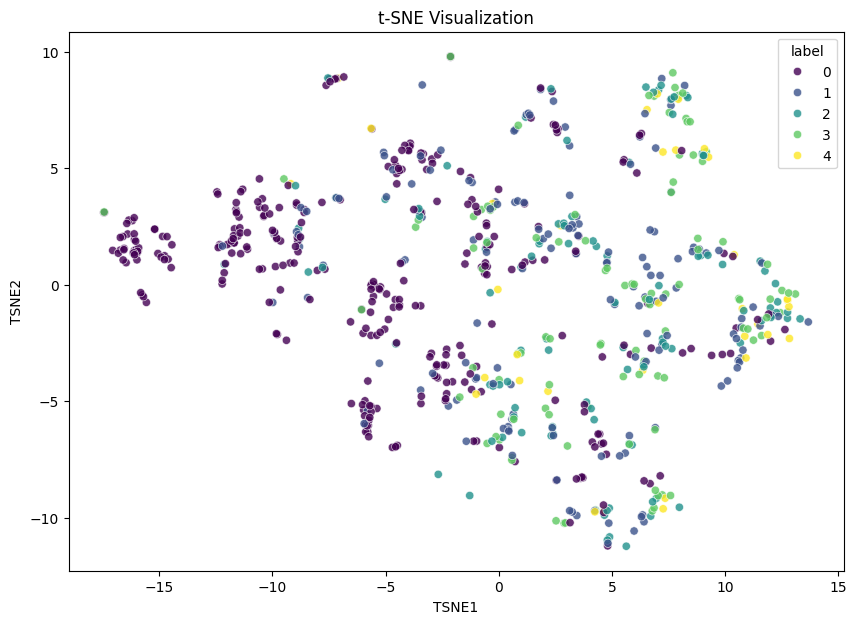

In [45]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar las características (X) y normalizarlas
from sklearn.preprocessing import StandardScaler

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop(columns=['label']))

# Configurar t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)

# Aplicar t-SNE
X_tsne = tsne.fit_transform(X_scaled)

# Crear un DataFrame con los resultados t-SNE
tsne_data = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_data['label'] = data['label'].values

# Visualizar los resultados
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='TSNE1',
    y='TSNE2',
    hue='label',
    palette='viridis',
    data=tsne_data,
    legend='full',
    alpha=0.8
)
plt.title('t-SNE Visualization')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


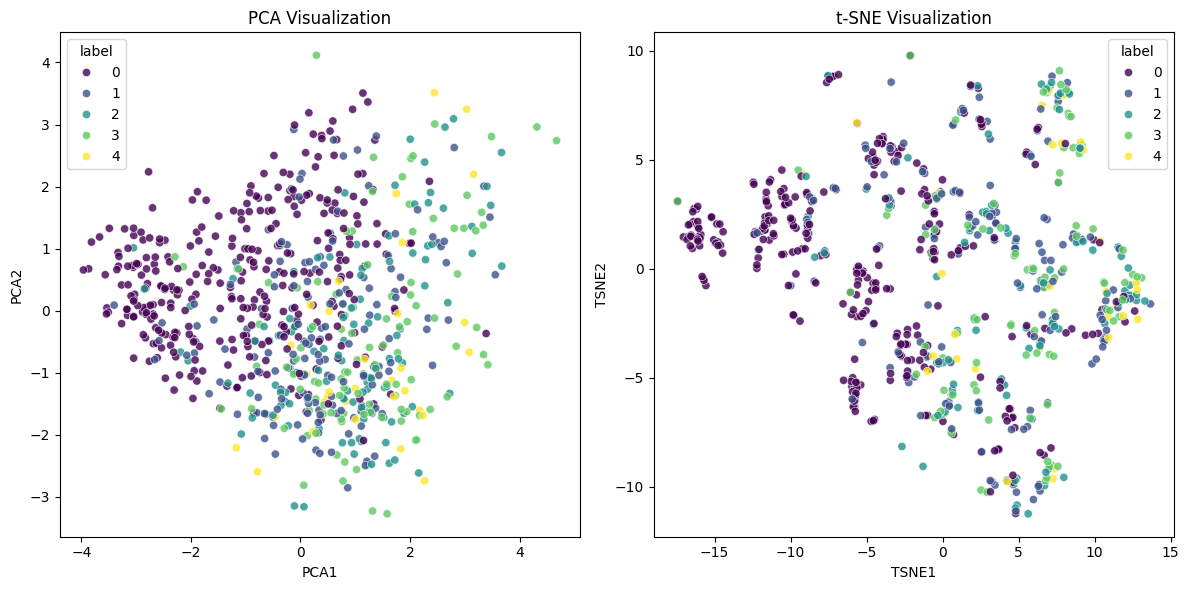

In [46]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop(columns=['label']))

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
X_tsne = tsne.fit_transform(X_scaled)

# Crear DataFrames para los resultados
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['label'] = data['label']

tsne_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['label'] = data['label']

# Visualización PCA
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(
    x='PCA1', y='PCA2', hue='label', palette='viridis', data=pca_df, alpha=0.8
)
plt.title('PCA Visualization')

# Visualización t-SNE
plt.subplot(1, 2, 2)
sns.scatterplot(
    x='TSNE1', y='TSNE2', hue='label', palette='viridis', data=tsne_df, alpha=0.8
)
plt.title('t-SNE Visualization')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


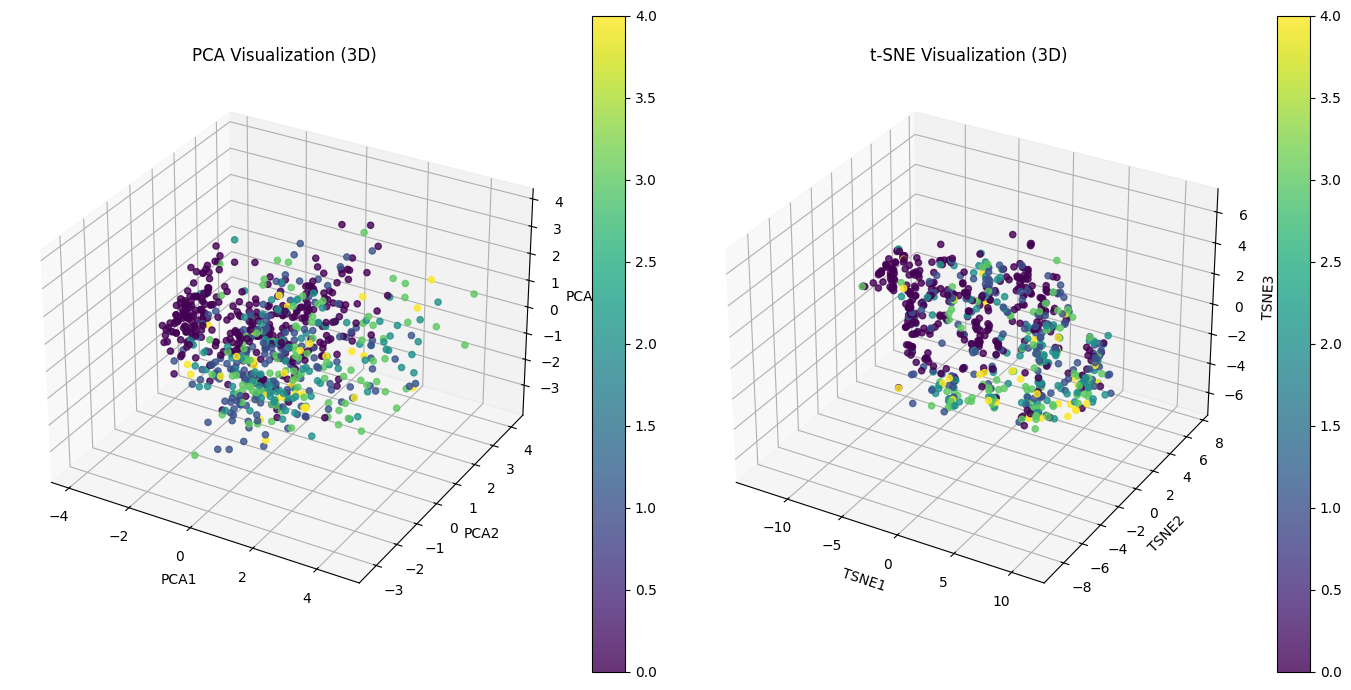

In [47]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop(columns=['label']))

# PCA en 3D
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# t-SNE en 3D
tsne = TSNE(n_components=3, random_state=42, perplexity=30, n_iter=300)
X_tsne = tsne.fit_transform(X_scaled)

# Crear DataFrames para los resultados
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2', 'PCA3'])
pca_df['label'] = data['label']

tsne_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2', 'TSNE3'])
tsne_df['label'] = data['label']

# Visualización PCA en 3D
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(121, projection='3d')
scatter = ax.scatter(
    pca_df['PCA1'], pca_df['PCA2'], pca_df['PCA3'],
    c=pca_df['label'], cmap='viridis', alpha=0.8
)
ax.set_title('PCA Visualization (3D)')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.colorbar(scatter, ax=ax)

# Visualización t-SNE en 3D
ax = fig.add_subplot(122, projection='3d')
scatter = ax.scatter(
    tsne_df['TSNE1'], tsne_df['TSNE2'], tsne_df['TSNE3'],
    c=tsne_df['label'], cmap='viridis', alpha=0.8
)
ax.set_title('t-SNE Visualization (3D)')
ax.set_xlabel('TSNE1')
ax.set_ylabel('TSNE2')
ax.set_zlabel('TSNE3')
plt.colorbar(scatter, ax=ax)

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



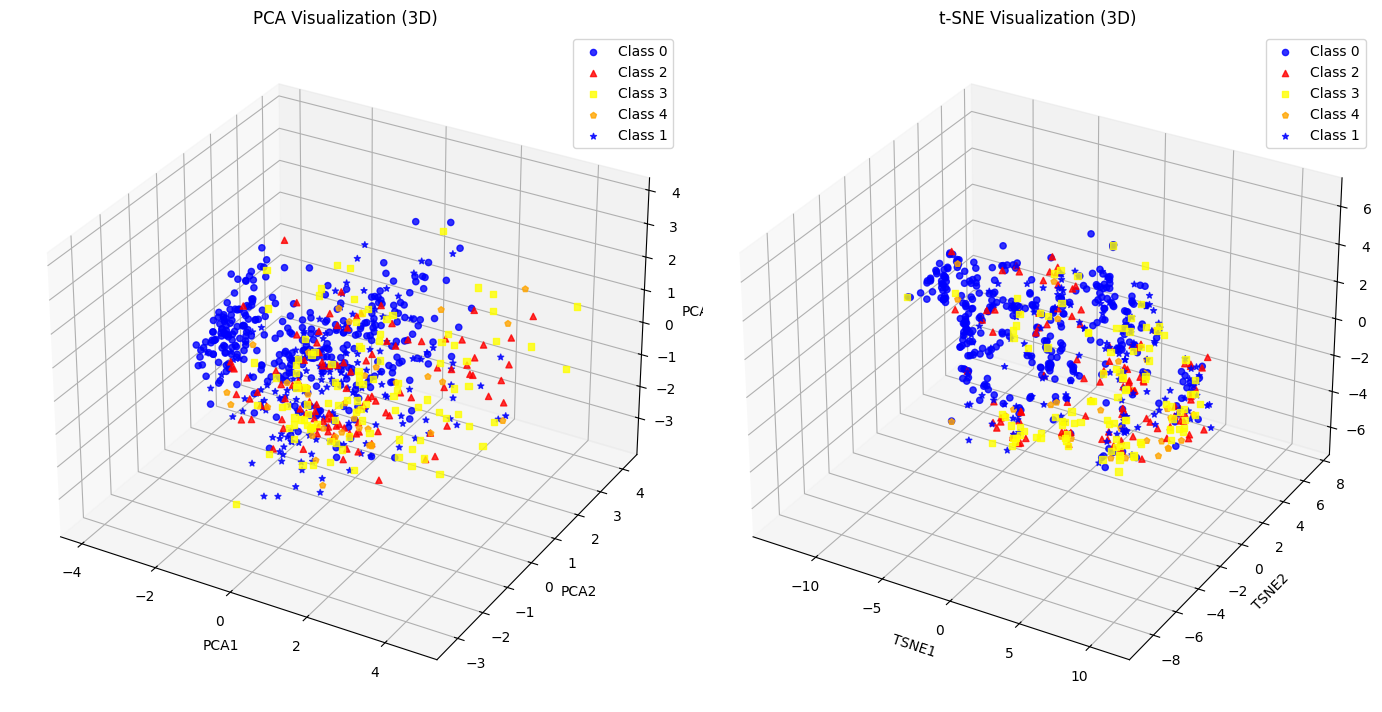

In [62]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop(columns=['label']))

# PCA en 3D
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# t-SNE en 3D
tsne = TSNE(n_components=3, random_state=42, perplexity=30, n_iter=300)
X_tsne = tsne.fit_transform(X_scaled)

# Crear DataFrames para los resultados
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2', 'PCA3'])
pca_df['label'] = data['label']

tsne_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2', 'TSNE3'])
tsne_df['label'] = data['label']

# Mapas de colores y formas
unique_labels = data['label'].unique()
colors = ['blue', 'red', 'yellow', 'orange']
markers = ['o', '^', 's', 'p', '*', 'h', 'D', 'v', '<', '>']

# Visualización PCA en 3D
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(121, projection='3d')
for i, label in enumerate(unique_labels):
    subset = pca_df[pca_df['label'] == label]
    ax.scatter(
        subset['PCA1'], subset['PCA2'], subset['PCA3'],
        c=colors[i % len(colors)], marker=markers[i % len(markers)], label=f'Class {label}', alpha=0.8
    )
ax.set_title('PCA Visualization (3D)')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.legend()

# Visualización t-SNE en 3D
ax = fig.add_subplot(122, projection='3d')
for i, label in enumerate(unique_labels):
    subset = tsne_df[tsne_df['label'] == label]
    ax.scatter(
        subset['TSNE1'], subset['TSNE2'], subset['TSNE3'],
        c=colors[i % len(colors)], marker=markers[i % len(markers)], label=f'Class {label}', alpha=0.8
    )
ax.set_title('t-SNE Visualization (3D)')
ax.set_xlabel('TSNE1')
ax.set_ylabel('TSNE2')
ax.set_zlabel('TSNE3')
ax.legend()

plt.tight_layout()
plt.show()


In [48]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import pandas as pd
import plotly.express as px

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop(columns=['label']))

# PCA en 3D
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2', 'PCA3'])
pca_df['label'] = data['label']

# t-SNE en 3D
tsne = TSNE(n_components=3, random_state=42, perplexity=30, n_iter=300)
X_tsne = tsne.fit_transform(X_scaled)
tsne_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2', 'TSNE3'])
tsne_df['label'] = data['label']

# Visualización interactiva PCA en 3D
fig_pca = px.scatter_3d(
    pca_df,
    x='PCA1',
    y='PCA2',
    z='PCA3',
    color='label',
    title='PCA Visualization (3D)',
    labels={'color': 'Label'},
    color_continuous_scale='Viridis'
)
fig_pca.show()

# Visualización interactiva t-SNE en 3D
fig_tsne = px.scatter_3d(
    tsne_df,
    x='TSNE1',
    y='TSNE2',
    z='TSNE3',
    color='label',
    title='t-SNE Visualization (3D)',
    labels={'color': 'Label'},
    color_continuous_scale='Viridis'
)
fig_tsne.show()


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


In [49]:
!pip install umap-learn

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



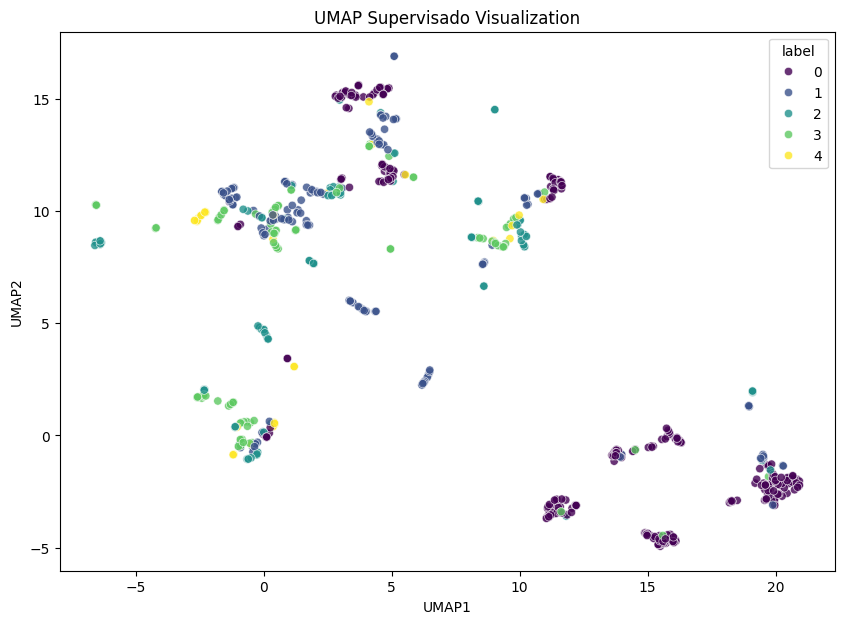

In [64]:
import umap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop(columns=['label']))
y = data['label']

# Configurar UMAP supervisado
umap_reducer = umap.UMAP(n_components=2,  random_state=42, metric='euclidean', n_neighbors= 9)
X_umap = umap_reducer.fit_transform(X_scaled, y)

# Crear un DataFrame con los resultados de UMAP
umap_df = pd.DataFrame(X_umap, columns=['UMAP1', 'UMAP2'])
umap_df['label'] = y

# Visualización de UMAP supervisado
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='UMAP1',
    y='UMAP2',
    hue='label',
    palette='viridis',
    data=umap_df,
    alpha=0.8
)
plt.title('UMAP Supervisado Visualization')
plt.show()


### SUBSAMPLING

In [ ]:
# from sklearn.utils import resample
# import pandas as pd

# # Analizar el desequilibrio de clases
# print("Distribución de clases antes del subsampling:")
# print(data['label'].value_counts())

# # Determinar el tamaño de la clase minoritaria
# min_class_size = data['label'].value_counts().min()

# # Realizar el subsampling
# balanced_data = []
# for label in data['label'].unique():
#     # Filtrar los datos de cada clase
#     class_data = data[data['label'] == label]
#     # Aplicar subsampling para igualar el tamaño
#     class_data_resampled = resample(class_data,
#                                     replace=False,
#                                     n_samples=min_class_size,
#                                     random_state=42)
#     balanced_data.append(class_data_resampled)

# # Combinar los datos subsampleados
# data_balanced = pd.concat(balanced_data)

# # Verificar el resultado
# print("Distribución después del subsampling:")
# print(data_balanced['label'].value_counts())


#Histograma por categoricas y label

In [ ]:
for columna in columns_to_check:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x=columna, hue='label', kde=True, multiple="stack")
    plt.title(f'Histograma de {columna} por label')
    plt.show()

In [ ]:
for columna in columns_to_check_categor:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=columna, hue='label', palette='Set2')
    plt.title(f'Gráfico de barras de {columna} por label')
    plt.show()

In [ ]:
for col in data.columns:
    print(f"Valores únicos en la columna {col}:")
    print(data[col].unique())
    print()  # Línea en blanco para separar cada columna

Numericas por Media

Categoricas "Limpieza por Moda"

In [ ]:
# Gráfica de correlacion entre label y el resto de variables

import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlation_matrix = data.corr()

# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()


In [ ]:
data.info(), data_test.info()

#Modelo

In [51]:
# Definir la variable dependiente (Y) y las variables independientes (X)
X = data.drop(columns=['label'])  # Eliminamos la columna 'label' de las características
y = data['label']  # La columna 'label' es la variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba con muestreo estratificado

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Definir el conjunto de hiperparámetros para la búsqueda
param_grid = {
    'max_depth': [12],
    'n_estimators' : [50]
}

# Configurar el modelo y la búsqueda por GridSearchCV
grid = GridSearchCV(
    estimator=RandomForestClassifier(
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=123,
    ),
    param_grid=param_grid,
    cv=10,
    refit=True,
    return_train_score=True,
    n_jobs=-1,
)

# Entrenar el modelo con el conjunto de entrenamiento
grid.fit(X_train, y_train)

# Mostrar los mejores parámetros encontrados
print("Mejores parámetros:", grid.best_params_)




Mejores parámetros: {'max_depth': 12, 'n_estimators': 50}


In [52]:
grid.best_params_

{'max_depth': 12, 'n_estimators': 50}

In [53]:
modelo_gridsearch = grid.best_estimator_

In [54]:
# Hacer predicciones con el modelo cargado
y_pred_cargado = modelo_gridsearch.predict(X_test)

# Evaluar el modelo cargado (por ejemplo, F1-score)
f1_cargado = f1_score(y_test, y_pred_cargado, average='weighted')
print(f'F1-score del modelo cargado: {f1_cargado:.2f}')

F1-score del modelo cargado: 0.46


In [55]:
subirkaggle = modelo_gridsearch.predict(data_test)

In [56]:
subirkaggle

array([2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 1, 1, 2, 2, 3, 3, 1, 1,
       1, 0, 3, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 2,
       0, 0, 3, 0, 0, 0, 2, 1, 1, 2, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 3, 2, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 2,
       2, 1, 3, 0, 3, 0, 0, 3, 2, 2, 1, 2, 0, 3, 1, 0, 2, 0, 2, 1, 0, 0,
       3, 0, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0, 3, 0, 0, 1, 0, 3, 0, 0, 3, 0,
       2, 1, 1, 1, 0, 0, 3, 0, 1, 1, 3, 0, 0, 2, 0, 0, 1, 3, 1, 0, 0, 3,
       1, 1, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 1, 0, 0, 2, 0, 3,
       0, 1, 0, 2, 0, 0, 0, 1])

In [58]:
import numpy as np

# Contar ocurrencias de cada tipo en el array
unique, counts = np.unique(subirkaggle, return_counts=True)

# Mostrar resultados
result = dict(zip(unique, counts))
print("Conteo de cada tipo:", result)


Conteo de cada tipo: {0: 98, 1: 42, 2: 24, 3: 20}


### HACEMOS UNA MATRIZ DE CONFUSION

---



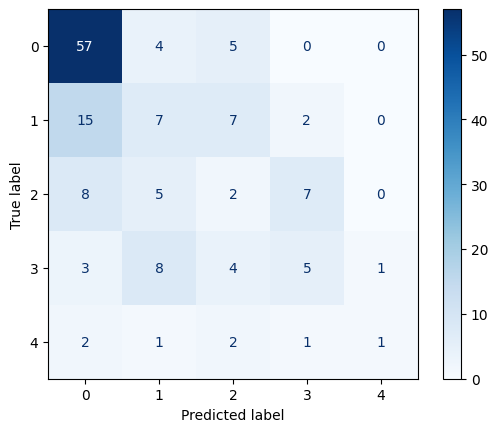

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_cargado)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid.classes_)
disp.plot(cmap="Blues")

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Supongamos que tu modelo ya está entrenado, por ejemplo, con RandomForestClassifier
# model.fit(X_train, y_train)

# Obtener la importancia de las características
feature_importances = modelo_gridsearch.feature_importances_

# Crear un DataFrame con las características y su importancia
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Visualizar la importancia
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Invertir el eje para que las características más importantes estén arriba
plt.title("Importancia de las Características")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.show()


### CURVAS DE ENTRENAMIENTO


---



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Obtener las curvas de aprendizaje
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=modelo_gridsearch,  # El modelo optimizado
    X=X_train,                   # Datos de entrenamiento
    y=y_train,                   # Etiquetas de entrenamiento
    cv=5,                        # Validación cruzada
    scoring='f1_micro',          # Métrica para evaluar
    n_jobs=-1,                   # Usar todos los núcleos disponibles
    train_sizes=np.linspace(0.1, 1.0, 10),  # Tamaños de entrenamiento (10%-100%)
    random_state=42
)

# Calcular las medias y desviaciones estándar
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Graficar las curvas
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Precisión en Entrenamiento', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.plot(train_sizes, validation_mean, label='Precisión en Validacion', color='green')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, color='green', alpha=0.2)

# Personalizar la gráfica
plt.title('Curvas de Aprendizaje')
plt.xlabel('Tamaño del Conjunto de Entrenamiento')
plt.ylabel('Puntuación F1 (micro)')
plt.legend()
plt.grid()
plt.show()


### EVALUAR BIAS Y VARIAZNZA EN EL MODELO


---



In [ ]:
from sklearn.metrics import accuracy_score

# Error en entrenamiento
train_error = 1 - accuracy_score(y_train, modelo_gridsearch.predict(X_train))

# Error en validación
val_error = 1 - accuracy_score(y_test, modelo_gridsearch.predict(X_test))

print(f"Train Error (Bias): {train_error:.2f}")
print(f"Validation Error (Variance): {val_error:.2f}")


### DESCARGAMOS LAS PREDICCIONES


---



In [ ]:
# # Crear un DataFrame con las predicciones y el índice (ID) de las filas
# y_pred_df = pd.DataFrame({
#     'ID': range(len(subirkaggle)),  # Índice que comienza desde 0
#     'label': subirkaggle  # Predicciones del modelo
# })

# # Guardar las predicciones en un archivo CSV
# y_pred_df.to_csv('predicciones_74_edu.csv', index=False)